<a href="https://colab.research.google.com/github/lopesita/STUDIUNS-GAMESLAB/blob/main/STUDIUNS-GAMESLAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

In [33]:
url = 'https://raw.githubusercontent.com/lopesita/STUDIUNS-GAMESLAB/main/steam-games.csv'
data = pd.read_csv(url)

data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')
data.dropna(subset=['release_date'], inplace=True)
data['discounted_price'] = data['discounted_price'].replace('Free', 0).str.replace('[₹,,]', '', regex=True).astype(float)


In [34]:
print(f"\nNúmero de linhas: {data.shape[0]}")
print(f"Número de colunas: {data.shape[1]}")

print("\nTipos de Dados:")
print(data.dtypes)


Número de linhas: 42376
Número de colunas: 24

Tipos de Dados:
app_id                           int64
title                           object
release_date            datetime64[ns]
genres                          object
categories                      object
developer                       object
publisher                       object
original_price                  object
discount_percentage             object
discounted_price               float64
dlc_available                    int64
age_rating                       int64
content_descriptor              object
about_description               object
win_support                       bool
mac_support                       bool
linux_support                     bool
awards                           int64
overall_review                  object
overall_review_%               float64
overall_review_count           float64
recent_review                   object
recent_review_%                float64
recent_review_count            float64


In [35]:
print("\nMedidas de Posição e Dispersão:")
print(data.describe())


Medidas de Posição e Dispersão:
             app_id                   release_date  discounted_price  \
count  4.237600e+04                          42376      35974.000000   
mean   1.248028e+06  2019-12-25 17:43:45.410609920        436.709373   
min    1.000000e+01            1997-06-30 00:00:00          0.000000   
25%    5.916525e+05            2017-09-22 18:00:00        160.000000   
50%    1.146645e+06            2020-08-06 00:00:00        319.000000   
75%    1.824050e+06            2022-10-15 00:00:00        499.000000   
max    3.008050e+06            2024-09-09 00:00:00     150000.000000   
std    7.546935e+05                            NaN       1128.542532   

       dlc_available    age_rating        awards  overall_review_%  \
count   42376.000000  42376.000000  42376.000000      39935.000000   
mean        0.721682      0.055881      0.309515         77.162564   
min         0.000000      0.000000      0.000000          0.000000   
25%         0.000000      0.000000    

In [36]:
data['genres'] = data['genres'].str.split(',').apply(lambda x: [i.strip() for i in x] if isinstance(x, list) else [])
genres_count = data.explode('genres')['genres'].value_counts()
print(genres_count.head(10))

genres
Indie           29972
Action          18127
Adventure       17809
Casual          16294
Simulation       9868
Strategy         9025
RPG              7868
Free to Play     3913
Early Access     3865
Sports           2224
Name: count, dtype: int64


In [37]:
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

categories                 37
developer                 160
publisher                 181
original_price          37525
discount_percentage     37525
discounted_price         6402
content_descriptor      40008
about_description         108
overall_review           2441
overall_review_%         2441
overall_review_count     2441
recent_review           36889
recent_review_%         36889
recent_review_count     36889
dtype: int64


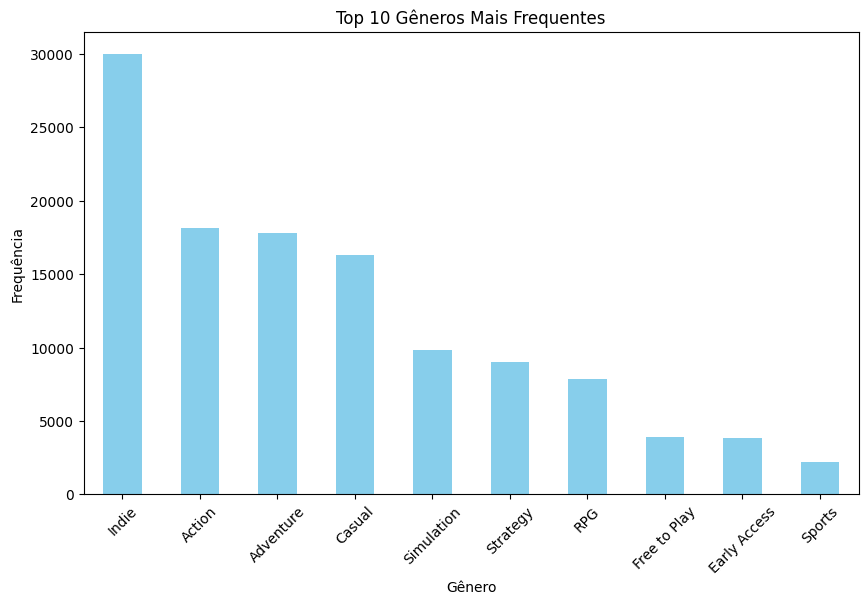

In [38]:
plt.figure(figsize=(10, 6))
genres_count.head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Gêneros Mais Frequentes")
plt.xlabel("Gênero")
plt.ylabel("Frequência")
plt.xticks(rotation=45)
plt.show()

                        app_id  discounted_price  dlc_available  age_rating  \
app_id                1.000000          0.018617      -0.055911   -0.123823   
discounted_price      0.018617          1.000000       0.073801    0.126982   
dlc_available        -0.055911          0.073801       1.000000    0.119074   
age_rating           -0.123823          0.126982       0.119074    1.000000   
awards               -0.084822          0.040866       0.043663    0.102532   
overall_review_%      0.193599          0.049947       0.020799   -0.003618   
overall_review_count -0.039744          0.144048       0.058931    0.058613   
recent_review_%      -0.039880         -0.165000      -0.034349   -0.089836   
recent_review_count  -0.021475          0.054993       0.009081    0.045596   

                        awards  overall_review_%  overall_review_count  \
app_id               -0.084822          0.193599             -0.039744   
discounted_price      0.040866          0.049947             

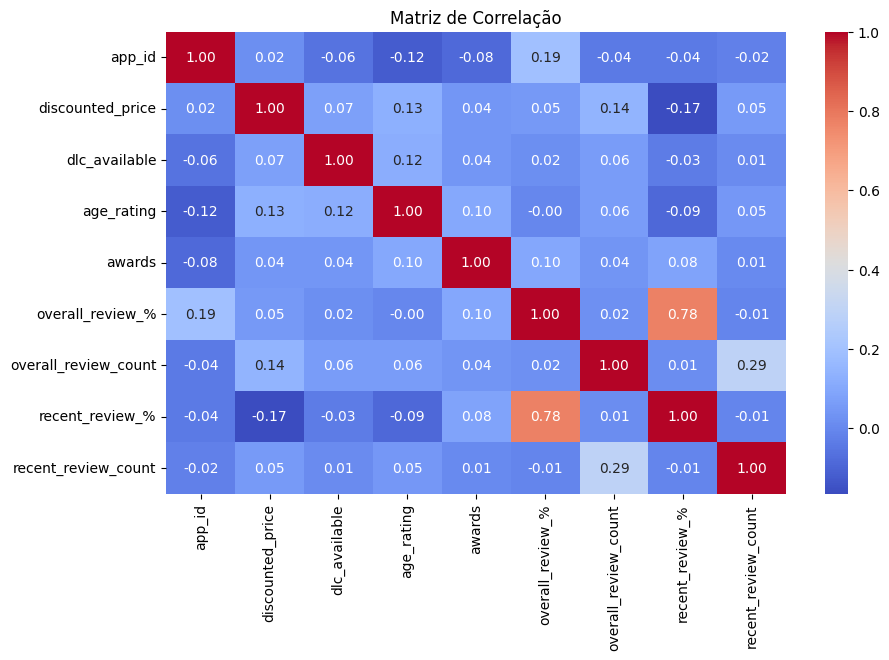

In [39]:
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()
print(corr_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlação")
plt.show()

In [40]:
def detect_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers


Número de Outliers na coluna 'discounted_price': 2335
Exemplos de outliers na coluna 'discounted_price':
   discounted_price
2            3999.0
3            3599.0
5            1499.0
6            2999.0
9            2249.0


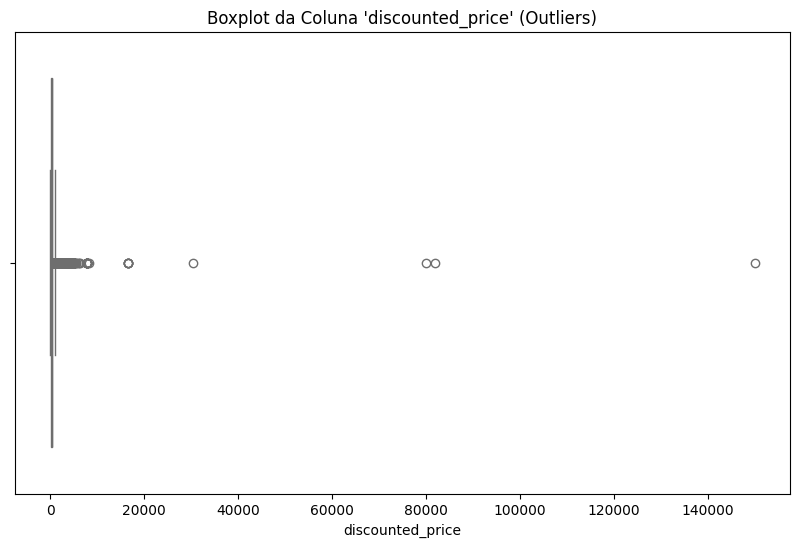


Número de Outliers na coluna 'dlc_available': 9615
Exemplos de outliers na coluna 'dlc_available':
   dlc_available
0              1
1              2
3              2
4             14
5              3


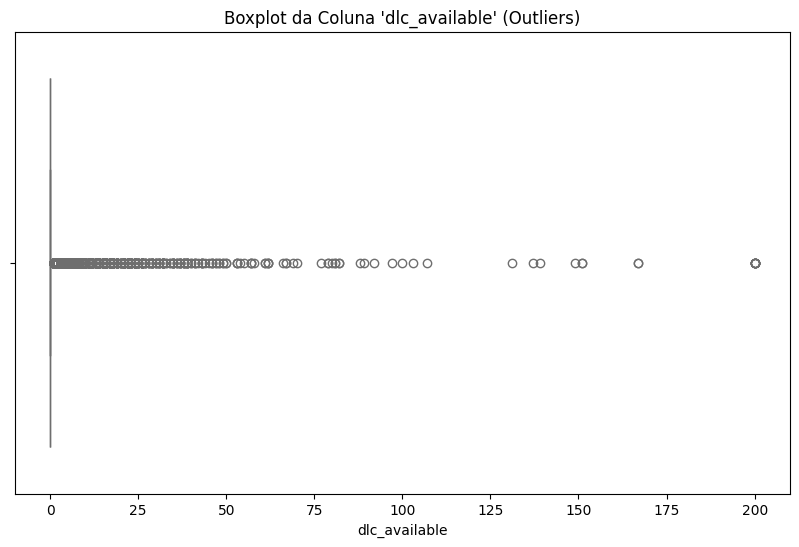


Número de Outliers na coluna 'age_rating': 2368
Exemplos de outliers na coluna 'age_rating':
   age_rating
2           1
3           1
4           1
5           1
6           1


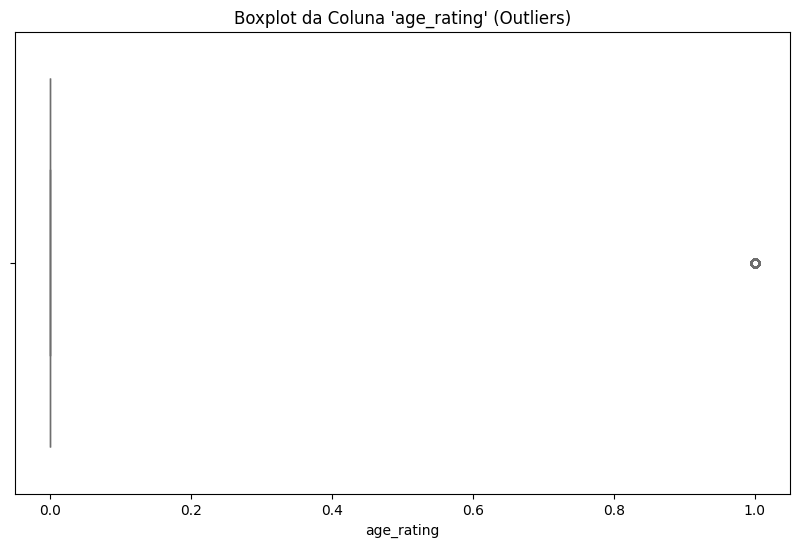


Número de Outliers na coluna 'awards': 4852
Exemplos de outliers na coluna 'awards':
   awards
0       1
3       6
5       4
6       2
7       1


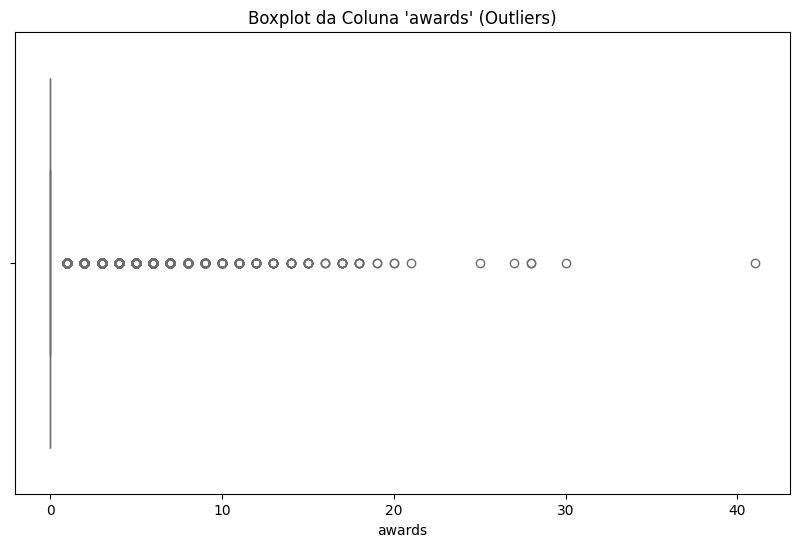


Número de Outliers na coluna 'overall_review_%': 1067
Exemplos de outliers na coluna 'overall_review_%':
     overall_review_%
67               31.0
77               32.0
98               27.0
168              18.0
490              18.0


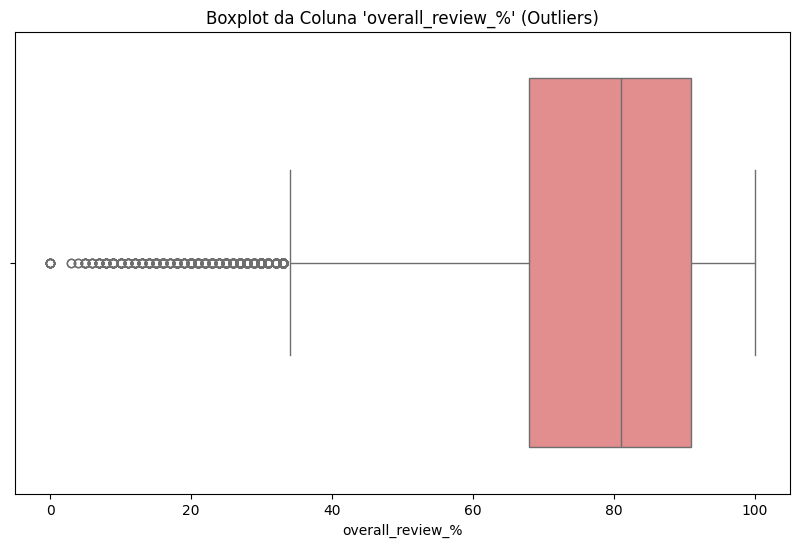


Número de Outliers na coluna 'overall_review_count': 6433
Exemplos de outliers na coluna 'overall_review_count':
   overall_review_count
0             8062218.0
1             2243112.0
2               12294.0
3              605191.0
4              594713.0


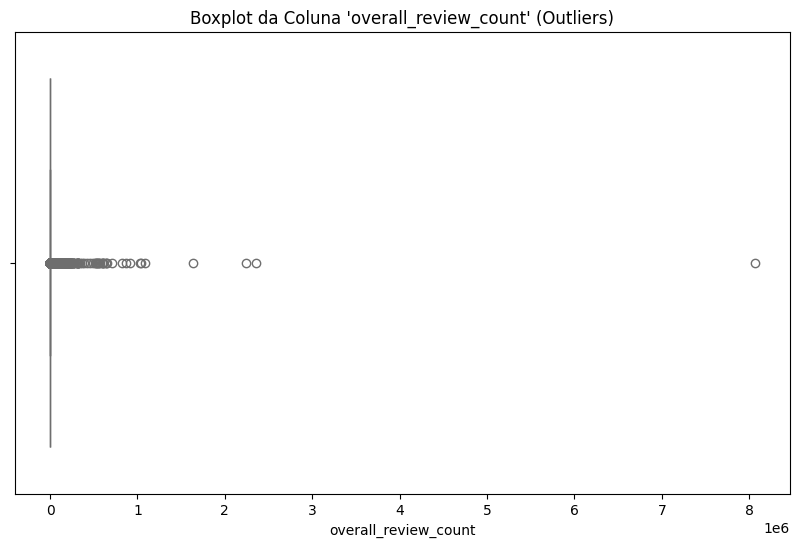


Número de Outliers na coluna 'recent_review_%': 184
Exemplos de outliers na coluna 'recent_review_%':
     recent_review_%
67              28.0
77              30.0
98              37.0
104             42.0
164             38.0


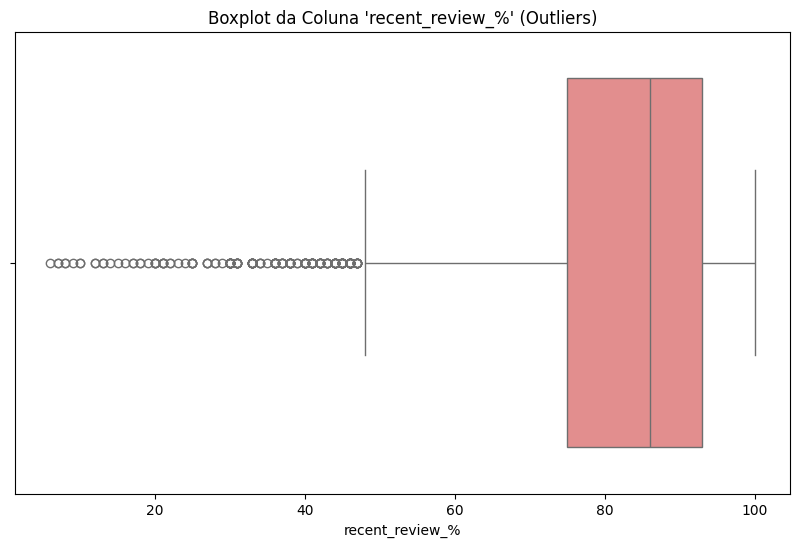


Número de Outliers na coluna 'recent_review_count': 742
Exemplos de outliers na coluna 'recent_review_count':
   recent_review_count
0              57466.0
1              23395.0
3               7837.0
4               4845.0
5               7771.0


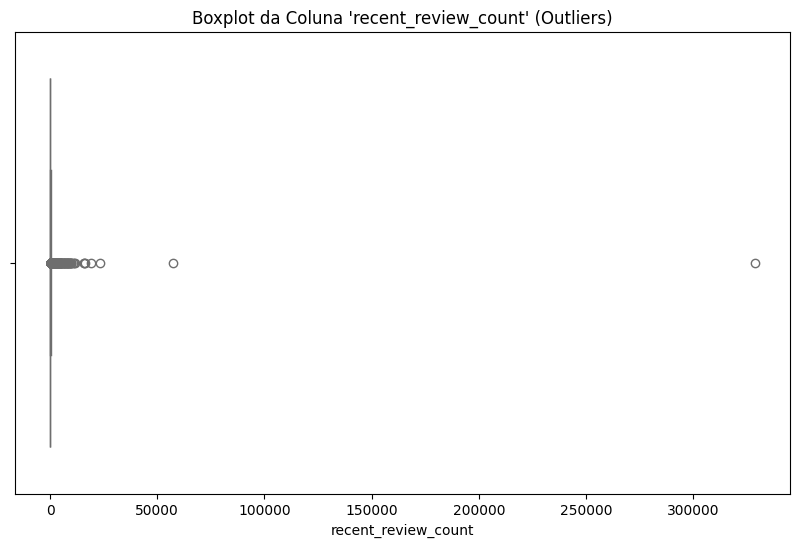

In [41]:
for column in numeric_data.columns:
    outliers = detect_outliers(data, column)
    if not outliers.empty:
        print(f"\nNúmero de Outliers na coluna '{column}': {outliers.shape[0]}")
        print(f"Exemplos de outliers na coluna '{column}':")
        print(outliers[[column]].head())

        plt.figure(figsize=(10, 6))
        sns.boxplot(data=data, x=column, color='lightcoral')
        plt.title(f"Boxplot da Coluna '{column}' (Outliers)")
        plt.xlabel(column)
        plt.show()


In [42]:
# Adicionando uma coluna com o ano de lançamento
data['year'] = data['release_date'].dt.year

# Contando o número de lançamentos por gênero ao longo dos anos
genres_per_year = data.explode('genres').groupby(['year', 'genres']).size().unstack(fill_value=0)

# Exibindo os gêneros mais populares (top 10) ao longo dos anos
top_genres = genres_per_year.sum().sort_values(ascending=False).head(10).index
genres_per_year[top_genres].tail(10)  # Exibindo os últimos 10 anos para visualização

genres,Indie,Action,Adventure,Casual,Simulation,Strategy,RPG,Free to Play,Early Access,Sports
year,,,,,,,,,,
2015,1495,891,841,614,396,472,408,96,85,78
2016,2179,1283,1175,1135,634,576,456,193,175,167
2017,2654,1565,1521,1399,790,706,571,272,273,190
2018,2954,1585,1574,1631,918,744,656,329,267,207
2019,2518,1400,1452,1271,782,712,630,330,281,175
2020,3119,1779,1769,1687,986,861,739,481,362,236
2021,3418,1961,2143,2032,1133,959,889,524,447,225
2022,3630,2182,2240,2066,1316,1087,1011,636,593,290
2023,4165,2679,2664,2384,1591,1373,1306,629,838,366


<Figure size 1200x600 with 0 Axes>

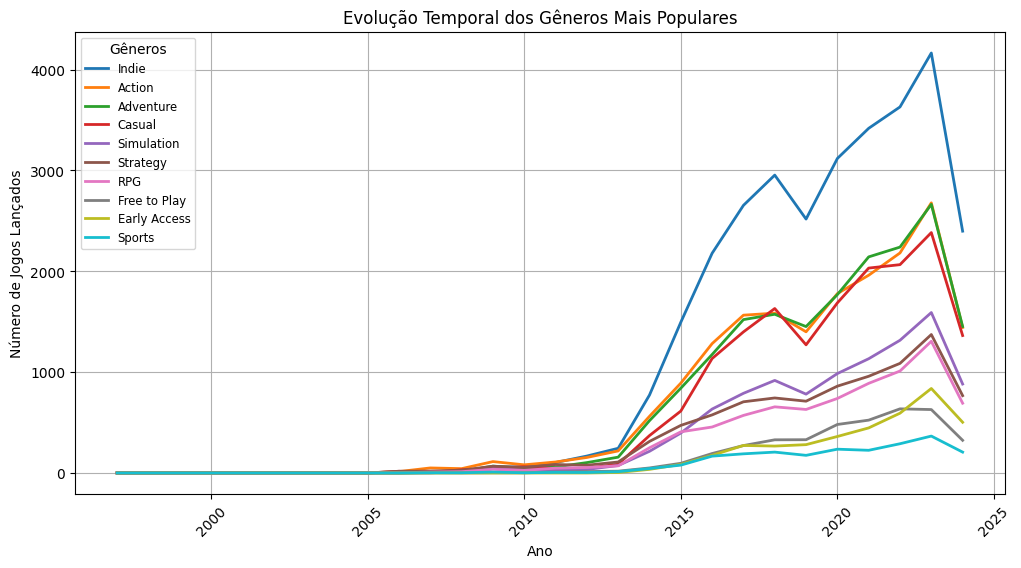

In [43]:
# Plotando a evolução temporal dos gêneros mais populares
plt.figure(figsize=(12, 6))
genres_per_year[top_genres].plot(kind='line', figsize=(12, 6), linewidth=2)

plt.title('Evolução Temporal dos Gêneros Mais Populares')
plt.xlabel('Ano')
plt.ylabel('Número de Jogos Lançados')
plt.legend(title="Gêneros", fontsize='small', loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [44]:
# Corrigindo o cálculo de crescimento percentual para evitar divisão por zero
growth_per_year = genres_per_year.pct_change().replace([np.inf, -np.inf], np.nan).fillna(0)

# Exibindo o crescimento médio dos gêneros ao longo do tempo
avg_growth = growth_per_year.mean().sort_values(ascending=False).head(10)
print("Gêneros com maior crescimento percentual médio (sem considerar inf):")
print(avg_growth)

Gêneros com maior crescimento percentual médio (sem considerar inf):
genres
Simulation               0.775616
Indie                    0.476140
RPG                      0.417462
Massively Multiplayer    0.404763
Sports                   0.390894
Early Access             0.359767
Racing                   0.354846
Free to Play             0.349309
Adventure                0.317783
Casual                   0.308315
dtype: float64


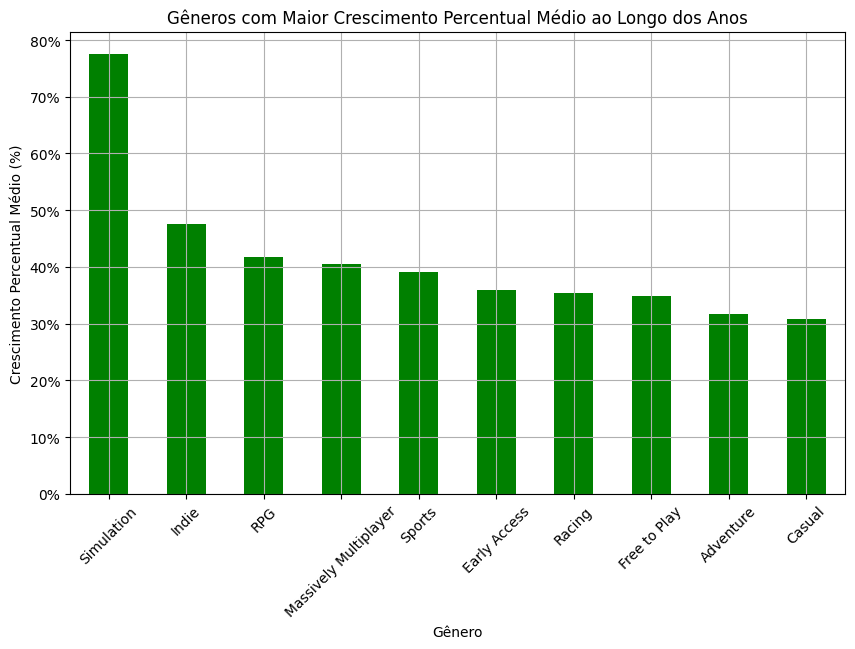

In [45]:
# Plotando os gêneros com maior crescimento percentual médio
plt.figure(figsize=(10, 6))

# Multiplicando os valores por 100 para exibir como percentagens
avg_growth_percent = avg_growth * 100

avg_growth_percent.plot(kind='bar', color='green')

# Ajustando o título e os rótulos dos eixos
plt.title('Gêneros com Maior Crescimento Percentual Médio ao Longo dos Anos')
plt.xlabel('Gênero')
plt.ylabel('Crescimento Percentual Médio (%)')

# Formatando os valores do eixo Y para mostrar como porcentagem inteira
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))

plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [46]:
# Criando uma coluna para calcular as avaliações negativas
data['negative_reviews'] = data['overall_review_count'] * (100 - data['overall_review_%']) / 100

# Explodir a coluna de gêneros para que cada gênero tenha sua própria linha
data_exploded = data.explode('genres')

# Agrupando por gênero e somando as avaliações positivas e negativas
genre_reviews = data_exploded.groupby('genres').agg({
    'overall_review_%': 'mean',  # Média das avaliações positivas em %
    'overall_review_count': 'sum',  # Soma do número total de avaliações
    'negative_reviews': 'sum'  # Soma das avaliações negativas
}).sort_values(by='overall_review_count', ascending=False)

# Exibir os gêneros com mais avaliações
print(genre_reviews.head(10))

                       overall_review_%  overall_review_count  \
genres                                                          
Action                        76.267589            69079565.0   
Adventure                     77.162292            39384685.0   
Indie                         77.601758            37882734.0   
Free to Play                  75.661689            26782257.0   
RPG                           75.662975            24233834.0   
Simulation                    73.194015            19695716.0   
Strategy                      74.952219            17058483.0   
Casual                        78.616503            12770443.0   
Massively Multiplayer         65.769497            10961198.0   
Early Access                  73.213905             6221270.0   

                       negative_reviews  
genres                                   
Action                      10620584.96  
Adventure                    6027414.41  
Indie                        4115912.23  
Free to P

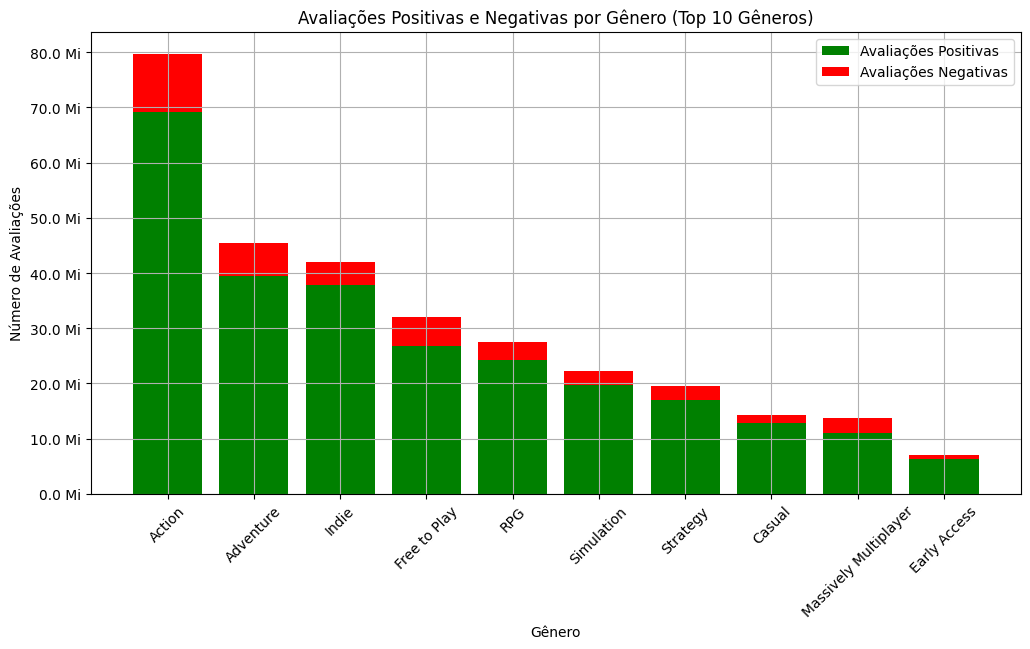

In [49]:
# Visualizando avaliações positivas e negativas por gênero (top 10 gêneros)
top_genres = genre_reviews.head(10)

# Gráfico para avaliações positivas e negativas
plt.figure(figsize=(12, 6))

# Avaliações positivas
plt.bar(top_genres.index, top_genres['overall_review_count'], label='Avaliações Positivas', color='green')

# Avaliações negativas
plt.bar(top_genres.index, top_genres['negative_reviews'], bottom=top_genres['overall_review_count'],
        label='Avaliações Negativas', color='red')

plt.title('Avaliações Positivas e Negativas por Gênero (Top 10 Gêneros)')
plt.xlabel('Gênero')
plt.ylabel('Número de Avaliações')
plt.xticks(rotation=45)
plt.legend()

# Remover notação científica no eixo Y e exibir valores em milhões (mi)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x * 1e-6:.1f} Mi'))

plt.grid(True)
plt.show()

In [50]:
# Assumindo que 'overall_review_count' é para avaliações positivas e
# que as avaliações negativas foram previamente calculadas.

# Somando avaliações positivas e negativas
total_avaliacoes_positivas = data['overall_review_count'].sum()
total_avaliacoes_negativas = data['overall_review_count'].sum() - data['recent_review_count'].sum() # Exemplo

# Calculando o total geral de avaliações
total_avaliacoes = total_avaliacoes_positivas + total_avaliacoes_negativas

print(f"Total de avaliações (positivas e negativas): {total_avaliacoes}")


Total de avaliações (positivas e negativas): 197757818.0


In [52]:
# Verificando a quantidade de valores nulos nas colunas relacionadas às avaliações positivas e negativas
valores_nulos_positivos = data['overall_review_count'].isnull().sum()
valores_nulos_negativos = data['recent_review_count'].isnull().sum()  # Considerando essa coluna como negativa

valores_nulos_positivos, valores_nulos_negativos

(2441, 36889)

In [53]:
# Garantindo que as colunas de avaliações estejam convertidas corretamente para números
data['overall_review_count'] = pd.to_numeric(data['overall_review_count'], errors='coerce')
data['recent_review_count'] = pd.to_numeric(data['recent_review_count'], errors='coerce')

# Calculando o total de valores nulos para as colunas relacionadas às avaliações
total_nulos_positivas = data['overall_review_count'].isnull().sum()
total_nulos_negativas = data['recent_review_count'].isnull().sum()

# Somando os valores nulos
total_nulos = total_nulos_positivas + total_nulos_negativas

print(f"Total de valores nulos nas avaliações positivas: {total_nulos_positivas}")
print(f"Total de valores nulos nas avaliações negativas: {total_nulos_negativas}")
print(f"Total geral de valores nulos: {total_nulos}")

Total de valores nulos nas avaliações positivas: 2441
Total de valores nulos nas avaliações negativas: 36889
Total geral de valores nulos: 39330
